# Impacto de la deforestación en el regimen de caudales de los rios en Colombia (TEAM 28)

## EDA - Describe, NaN, GeoMaps

### Librerias

In [1]:
import numpy as np 
import pandas as pd

import geopandas as gpd
import geoplot as geop
import descartes as dsc

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Reading geographic files

In [2]:
fp = '../data/shapes/Basins_Colombia.shp'
data_geo = gpd.read_file(fp, encoding = 'utf-8')

fp_est = '../data/shapes/CNE_IDEAM CNE.shp'
data_geo_est = gpd.read_file(fp_est, encoding = 'utf-8')

In [3]:
print('Tipo de objeto cuencas : ', type(data_geo), '\n')
print('Tamaño del objeto cuencas: ', data_geo.shape, '\n')
print('Columnas del objeto cuencas: ', data_geo.columns, '\n')
print(data_geo.head)

print('Tipo de objeto estaciones: ', type(data_geo_est), '\n')
print('Tamaño del objeto estaciones: ', data_geo_est.shape, '\n')
print('Columnas del objeto estaciones: ', data_geo_est.columns, '\n')
print(data_geo_est.head)

Tipo de objeto cuencas :  <class 'geopandas.geodataframe.GeoDataFrame'> 

Tamaño del objeto cuencas:  (316, 11) 

Columnas del objeto cuencas:  Index(['cod_ah', 'cod_szh', 'cod_zh', 'nom_ah', 'nom_szh', 'nom_zh',
       'objectid_1', 'ruleid', 'shape_area', 'shape_leng', 'geometry'],
      dtype='object') 

<bound method NDFrame.head of      cod_ah  cod_szh  cod_zh           nom_ah  \
0       1.0   1701.0    17.0           Caribe   
1       1.0   1702.0    17.0           Caribe   
2       1.0   1703.0    17.0           Caribe   
3       2.0   2602.0    26.0  Magdalena Cauca   
4       2.0   2632.0    26.0  Magdalena Cauca   
..      ...      ...     ...              ...   
311     3.0   3516.0    35.0          Orinoco   
312     1.0   1117.0    11.0           Caribe   
313     1.0   1509.0    15.0           Caribe   
314     5.0   5310.0    53.0         Pacifico   
315     5.0   5309.0    53.0         Pacifico   

                                   nom_szh                     nom_zh  \

In [4]:
print(data_geo_est['CATEGORIA'].unique())

data_geo_est.head(5)

['Limnigráfica' 'Climática Principal' 'Mareográfica' 'Pluviográfica'
 'Climática Ordinaria' 'Agrometeorológica' 'Limnimétrica' 'Pluviométrica'
 'Meteorológica Especial' 'Sinóptica Principal' 'Sinóptica Secundaria'
 'Radio Sonda']


,OBJECTID,CODIGO,nombre,CATEGORIA,TECNOLOGIA,ESTADO,FECHA_INST,altitud,latitud,longitud,...,MUNICIPIO,AREA_OPERA,AREA_HIDRO,ZONA_HIDRO,observacio,CORRIENTE,FECHA_SUSP,SUBZONA_HI,ENTIDAD,geometry
0,1,52057100,RUMICHACA - AUT [52057100],Limnigráfica,Automática con Telemetría,Activa,2016/11/15 00:00:00.000,2582,0.813786,-77.661978,...,Ipiales,Area Operativa 07 - Nariño-Putumayo,Pacifico,Patía,None,Guaitara,None,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-77.66198 0.81379 2582.00000)
1,2,52055170,LA JOSEFINA - AUT [52055170],Climática Principal,Automática con Telemetría,Activa,2005/12/10 00:00:00.000,2450,0.930306,-77.491194,...,Contadero,Area Operativa 07 - Nariño-Putumayo,Pacifico,Patía,None,Guaitara,None,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-77.49119 0.93031 2450.00000)
2,3,52055220,EL PARAISO - AUT [52055220],Climática Principal,Automática con Telemetría,Activa,2004/03/01 00:00:00.000,3120,1.070611,-77.636889,...,Túquerres,Area Operativa 07 - Nariño-Putumayo,Pacifico,Patía,None,Guaitara,None,Río Guáitara,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-77.63689 1.07061 3120.00000)
3,4,44015070,EL PEPINO - AUT [44015070],Climática Principal,Automática con Telemetría,Activa,2005/11/11 00:00:00.000,760,1.082889,-76.667111,...,Mocoa,Area Operativa 07 - Nariño-Putumayo,Amazonas,Caquetá,None,Guaitara,None,Alto Caqueta,INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-76.66711 1.08289 760.00000)
4,5,48015040,PUERTO NARINO - AUT [48015040],Climática Principal,Automática con Telemetría,Activa,2005/07/19 00:00:00.000,158,-3.780306,-70.362639,...,Puerto Nariño,Area Operativa 11 - Cundinamarca-Amazonas-San ...,Amazonas,Amazonas - Directos,None,Amazonas,None,Directos Río Amazonas (mi),INSTITUTO DE HIDROLOGIA METEOROLOGIA Y ESTUDIO...,POINT Z (-70.36264 -3.78031 158.00000)


In [5]:
data_geo.head(5)

,cod_ah,cod_szh,cod_zh,nom_ah,nom_szh,nom_zh,objectid_1,ruleid,shape_area,shape_leng,geometry
0,1.0,1701.0,17.0,Caribe,San Andres,Islas Caribe,1.0,2.0,0.002232,0.358011,"POLYGON ((-81.70399 12.59487, -81.70394 12.594..."
1,1.0,1702.0,17.0,Caribe,Providencia,Islas Caribe,2.0,2.0,0.001842,0.294393,"MULTIPOLYGON (((-81.37077 13.39450, -81.37077 ..."
2,1.0,1703.0,17.0,Caribe,Roncador y Quitasue?o,Islas Caribe,3.0,2.0,0.002260,0.341056,"MULTIPOLYGON (((-81.10900 14.46640, -81.12305 ..."
3,2.0,2602.0,26.0,Magdalena Cauca,R?o Palac?,Cauca,4.0,3.0,0.075834,1.709663,"POLYGON ((-76.23000 2.55375, -76.22958 2.55250..."
4,2.0,2632.0,26.0,Magdalena Cauca,"R?os Guabas,Sabaletas y Sonso",Cauca,8.0,3.0,0.045246,1.027300,"POLYGON ((-76.10625 3.82250, -76.10542 3.82167..."


### Geo Maps

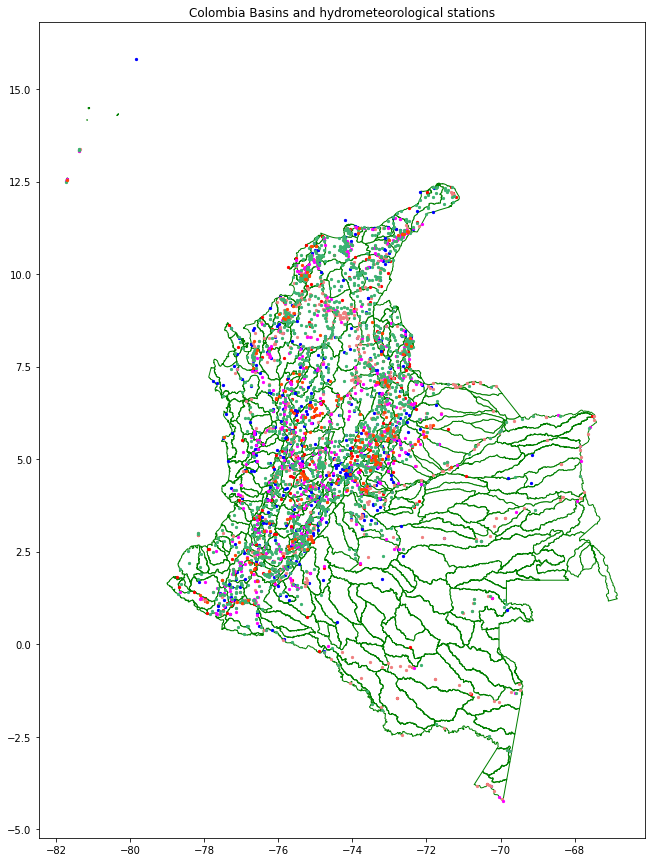

In [11]:
#fig, ax = plt.subplots(figsize=(10,10))
#mapa = data_geo.plot(ax = ax)

data_geo_est_climappal = data_geo_est[data_geo_est['CATEGORIA'] == 'Climática Principal'].reset_index()
data_geo_est_climaord = data_geo_est[data_geo_est['CATEGORIA'] == 'Climática Ordinaria'].reset_index()
data_geo_est_lmm = data_geo_est[data_geo_est['CATEGORIA'] == 'Limnimétrica'].reset_index()
data_geo_est_lmg = data_geo_est[data_geo_est['CATEGORIA'] == 'Limnigráfica'].reset_index()
data_geo_est_plm = data_geo_est[data_geo_est['CATEGORIA'] == 'Pluviométrica'].reset_index()
data_geo_est_plg = data_geo_est[data_geo_est['CATEGORIA'] == 'Pluviográfica'].reset_index()

fig, ax = plt.subplots(figsize=(15,15))
ax.set_title('Colombia Basins and hydrometeorological stations')
mapa_base = data_geo.plot(ax = ax, color = 'white', edgecolor='green')
mapa_base = data_geo_est_climappal.plot(ax = mapa_base, marker = 'o', color = 'red', 
                                        markersize = 5)
mapa_final = data_geo_est_climaord.plot(ax = mapa_base, marker = 'o', color = 'blue', 
                                        markersize = 5)
mapa_final = data_geo_est_lmm.plot(ax = mapa_base, marker = 'o', color = 'lightcoral', 
                                   markersize = 5)
mapa_final = data_geo_est_lmg.plot(ax = mapa_base, marker = 'o', color = 'fuchsia', 
                                   markersize = 5)
mapa_final = data_geo_est_plm.plot(ax = mapa_base, marker = 'o', color = 'mediumseagreen', 
                                   markersize = 5)
mapa_final = data_geo_est_plg.plot(ax = mapa_base, marker = 'o', color = 'orangered', 
                                   markersize = 5)

In [7]:
data_geo_join = gpd.sjoin(data_geo, data_geo_est)

#print(data_geo.columns)
#print(data_geo_est.columns)
#print(data_geo_join.columns)

#print(data_geo_join.shape)
#print(data_geo_join.head())

df_count_est = pd.pivot_table(data_geo_join, index = ['objectid_1'], 
                              aggfunc = {'OBJECTID':'count'}).reset_index()

df_count_est.columns = ['objectid_1', 'Qty_stations']

df_count_est

,objectid_1,Qty_stations
0,1.0,8
1,2.0,8
2,4.0,12
3,5.0,7
4,6.0,17
...,...,...
244,310.0,17
245,311.0,7
246,312.0,10
247,313.0,1


### Heat Geo Map

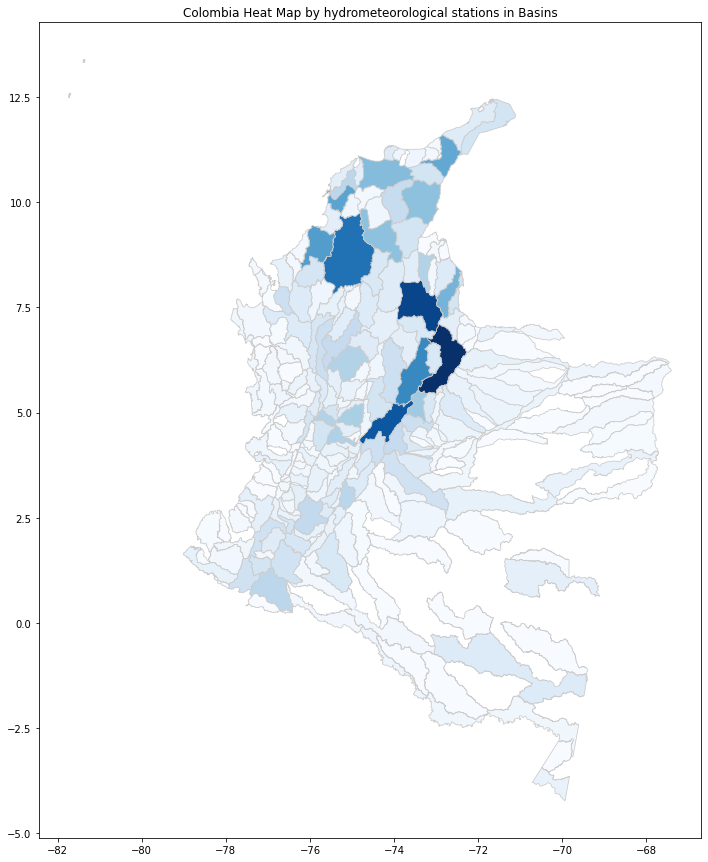

In [10]:
temp_df = pd.merge(data_geo, df_count_est, on = ['objectid_1'], how = 'inner')
temp_df['Qty_stations'].fillna(0, inplace = True)

max_Qty_stations = float(temp_df['Qty_stations'].max())

temp_df['perc'] = 0
temp_df['perc'] = (temp_df['Qty_stations'].div(max_Qty_stations) * 100).round(0)

fig, ax = plt.subplots(nrows = 1, figsize=(15,15))
titulo = 'Colombia Heat Map by hydrometeorological stations in Basins'
ax.set_title(titulo)
mapa1 = temp_df.plot(column = 'perc', cmap = 'Blues', linewidth = 0.8, ax = ax, 
                     edgecolor = '0.8')


### Variables read on stations - Basin `Colombia`

In [71]:
colombia = pd.read_csv('../data/variables/data-colombia-month-fill.zip')

colombia.head()

,fecha,anio,mes,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,loss_cover_histo,loss_cover_fcl,loss_cover_fcl_perc,loss_cover_perc_acum
0,2000-01-01,2000,1,34.0,0.0,0.0,23.2850,13.4800,64.5850,11.95,24.775,NaN,NaN,NaN,NaN
1,2000-02-01,2000,2,45.0,1.0,0.0,19.4850,7.7769,70.8585,12.40,26.200,NaN,NaN,NaN,NaN
2,2000-03-01,2000,3,38.6,0.5,0.0,19.6350,14.3280,85.0000,12.00,24.900,NaN,NaN,NaN,NaN
3,2000-04-01,2000,4,39.5,1.0,0.0,26.5625,13.6244,75.0000,13.30,25.600,NaN,NaN,NaN,NaN
4,2000-05-01,2000,5,47.5,2.5,0.0,42.6350,14.3280,122.0000,13.15,25.400,NaN,NaN,NaN,NaN


In [28]:
colombia.describe()
#colombia.describe().to_csv('../temp/output.csv')

In [85]:
temp_df = colombia[(colombia['PTPM_CON_max'].isna()) | (colombia['PTPM_CON_median'].isna()) | 
                   (colombia['PTPM_CON_min'].isna()) | (colombia['Q_MEDIA_D_median'].isna()) | 
                   (colombia['Q_MN_D_min'].isna()) | (colombia['Q_MX_D_max'].isna()) | 
                   (colombia['TMN_CON_min'].isna()) | (colombia['TMX_CON_max'].isna()) | 
                   (colombia['loss_cover_histo'].isna()) | 
                   (colombia['loss_cover_fcl'].isna()) | 
                   (colombia['loss_cover_fcl_perc'].isna()) | 
                   (colombia['loss_cover_perc_acum'].isna())]

temp_df = pd.pivot_table(temp_df, index = ['anio'], aggfunc = 'count').reset_index(drop = False)

temp_df.iloc[:, 1:] = 12 - temp_df.iloc[:, 1:]

temp_df.head()
#temp_df.head().to_csv('../temp/output.csv')

### Variables in some stations

In [89]:
basins = pd.read_csv('../data/variables/data-cuenca-month-fill.zip')

basins.head()

,fecha,cuenca,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,elevacion,anio,mes,basin_perimeter,basin_area,loss_cover_histo,loss_cover_fcl,loss_cover_fcl_perc,loss_cover_perc_acum
0,2000-01-01,103,40.0,2.0,0.0,14.48,8.76,35.48,NaN,NaN,1834.0,2000,1,1.876566,60038.081,NaN,NaN,NaN,NaN
1,2000-02-01,103,50.0,4.0,0.0,10.94,7.08,40.52,NaN,NaN,1834.0,2000,2,1.876566,60038.081,NaN,NaN,NaN,NaN
2,2000-03-01,103,38.0,3.0,0.0,10.68,6.60,20.54,NaN,NaN,1834.0,2000,3,1.876566,60038.081,NaN,NaN,NaN,NaN
3,2000-04-01,103,25.0,2.0,0.0,9.00,6.60,16.56,NaN,NaN,1834.0,2000,4,1.876566,60038.081,NaN,NaN,NaN,NaN
4,2000-05-01,103,23.0,2.0,0.0,10.30,6.60,25.16,NaN,NaN,1834.0,2000,5,1.876566,60038.081,NaN,NaN,NaN,NaN


In [90]:
selected_basins = [27, 28, 30, 36, 42, 44]

basins_select = basins[basins['cuenca'].isin(selected_basins)]

basins_select.head()

,fecha,cuenca,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,elevacion,anio,mes,basin_perimeter,basin_area,loss_cover_histo,loss_cover_fcl,loss_cover_fcl_perc,loss_cover_perc_acum
4320,2000-01-01,27,40.5,2.5,0.0,23.7,18.20,62.30,NaN,NaN,1225.0,2000,1,2.229421,153380.882,NaN,NaN,NaN,NaN
4321,2000-02-01,27,40.0,2.5,0.0,32.1,20.40,140.08,NaN,NaN,1225.0,2000,2,2.229421,153380.882,NaN,NaN,NaN,NaN
4322,2000-03-01,27,48.0,3.0,0.0,31.9,19.85,85.00,NaN,NaN,1225.0,2000,3,2.229421,153380.882,NaN,NaN,NaN,NaN
4323,2000-04-01,27,30.0,3.0,0.0,44.3,22.80,75.00,NaN,NaN,1225.0,2000,4,2.229421,153380.882,NaN,NaN,NaN,NaN
4324,2000-05-01,27,38.0,5.0,0.0,50.7,32.90,112.80,NaN,NaN,1225.0,2000,5,2.229421,153380.882,NaN,NaN,NaN,NaN


In [91]:
for i in selected_basins:
    print(basins_select[basins_select['cuenca'] == i].describe())
    basins_select[basins_select['cuenca'] == i].describe().to_csv('../temp/output_' + 
                                                                  str(i) + '.csv')

       cuenca  PTPM_CON_max  PTPM_CON_median  PTPM_CON_min  Q_MEDIA_D_median  \
count   240.0    240.000000       240.000000         240.0        240.000000   
mean     27.0     35.032500         1.413333           0.0         28.489918   
std       0.0     16.750075         1.988078           0.0         11.192943   
min      27.0      2.500000         0.000000           0.0          7.400000   
25%      27.0     23.000000         0.000000           0.0         20.752109   
50%      27.0     34.500000         0.500000           0.0         27.291469   
75%      27.0     44.000000         2.062500           0.0         34.502637   
max      27.0    107.000000        13.500000           0.0         65.600000   

       Q_MN_D_min  Q_MX_D_max  TMN_CON_min  TMX_CON_max  elevacion  \
count  240.000000  240.000000          0.0          0.0      240.0   
mean    18.041335   79.007446          NaN          NaN     1225.0   
std      6.405949   36.822908          NaN          NaN        0.0   

       cuenca  PTPM_CON_max  PTPM_CON_median  PTPM_CON_min  Q_MEDIA_D_median  \
count   240.0    240.000000       240.000000         240.0        240.000000   
mean     36.0     45.179167         2.194167           0.0         45.722532   
std       0.0     24.655319         4.300947           0.0         16.032349   
min      36.0      0.000000         0.000000           0.0         11.600000   
25%      36.0     27.425000         0.000000           0.0         33.304063   
50%      36.0     42.000000         0.000000           0.0         45.389062   
75%      36.0     60.000000         1.400000           0.0         56.312500   
max      36.0    145.000000        20.000000           0.0         93.659375   

       Q_MN_D_min  Q_MX_D_max  TMN_CON_min  TMX_CON_max  elevacion  \
count  240.000000  240.000000          0.0          0.0      240.0   
mean    30.989417  157.635958          NaN          NaN      648.5   
std      9.777990  100.713179          NaN          NaN        0.0   

In [95]:
basins_select.columns

Index(['fecha', 'cuenca', 'PTPM_CON_max', 'PTPM_CON_median', 'PTPM_CON_min',
       'Q_MEDIA_D_median', 'Q_MN_D_min', 'Q_MX_D_max', 'TMN_CON_min',
       'TMX_CON_max', 'elevacion', 'anio', 'mes', 'basin_perimeter',
       'basin_area', 'loss_cover_histo', 'loss_cover_fcl',
       'loss_cover_fcl_perc', 'loss_cover_perc_acum'],
      dtype='object')

In [115]:
temp_df = basins_select.isna().copy()
temp_df.drop(columns = ['fecha', 'elevacion'], inplace = True)

temp_df = pd.pivot_table(temp_df, index = ['anio', 'mes', 'cuenca'], aggfunc = 'count').reset_index(drop = False)

#temp_df.iloc[:, 3:] = temp_df.iloc[:, 3:].apply(lambda x : if pd.isnull(x) 'true' else 'false')

temp_df.head()
#temp_df.describe().to_csv('../temp/output.csv')

,anio,mes,cuenca,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,basin_area,basin_perimeter,loss_cover_fcl,loss_cover_fcl_perc,loss_cover_histo,loss_cover_perc_acum
0,False,False,False,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440,1440


In [100]:
basins_select[basins_select['cuenca'] == 27].isna()

,fecha,cuenca,PTPM_CON_max,PTPM_CON_median,PTPM_CON_min,Q_MEDIA_D_median,Q_MN_D_min,Q_MX_D_max,TMN_CON_min,TMX_CON_max,elevacion,anio,mes,basin_perimeter,basin_area,loss_cover_histo,loss_cover_fcl,loss_cover_fcl_perc,loss_cover_perc_acum
4320,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True
4321,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True
4322,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True
4323,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True
4324,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4556,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4557,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False
4558,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False


In [127]:
clima_ord = pd.read_csv('../data/variables/climatica_ordinaria_res.zip', low_memory = False)
clima_ppal = pd.read_csv('../data/variables/climatica_principal_res.zip', low_memory = False)

In [130]:
lista_df = [clima_ord, clima_ppal]

clima = pd.concat(lista_df)

In [121]:
print(clima_ord.shape)
clima_ord.head()

(3990276, 10)


,CodigoEstacion,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-01 00:00,11.6,50,NaN,900
1,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-02 00:00,12.2,50,NaN,900
2,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-03 00:00,13.6,50,NaN,900
3,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-04 00:00,13.0,50,NaN,900
4,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-05 00:00,13.6,50,NaN,900


In [131]:
print(clima_ppal.shape)
clima_ppal.head()

(1240194, 10)


,CodigoEstacion,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-01 00:00,20.8,50,NaN,900
1,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-02 00:00,24.2,50,NaN,900
2,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-03 00:00,22.2,50,NaN,900
3,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-04 00:00,21.2,50,NaN,900
4,12045010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-05 00:00,20.0,50,NaN,900


In [132]:
print(clima.shape)
clima.head()

(5230470, 10)


,CodigoEstacion,IdParametro,Etiqueta,DescripcionSerie,Frecuencia,Fecha,Valor,Grado,Calificador,NivelAprobacion
0,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-01 00:00,11.6,50,NaN,900
1,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-02 00:00,12.2,50,NaN,900
2,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-03 00:00,13.6,50,NaN,900
3,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-04 00:00,13.0,50,NaN,900
4,11025010,TEMPERATURA,TMN_CON,Temperatura mínima diaria,Diaria,1991-01-05 00:00,13.6,50,NaN,900


In [133]:
cuencas = pd.read_csv('../data/stations/EST316C.csv', sep = ';', low_memory = False)

In [134]:
print(cuencas.shape)
cuencas.head()

(3818, 6)


,COD,CAT,ELEV,CUENCA,X,Y
0,11017010,LM,75,199.0,"-76,53775","5,47361111"
1,11027030,LG,2299,198.0,"-76,15205556","5,862"
2,11027050,LG,75,198.0,"-76,51772222","5,52155556"
3,11037020,LG,77,197.0,"-76,61325","5,37475"
4,11047010,LG,26,311.0,"-76,66966667","5,76483333"
